Network X Code goes here, now we convert it into a graph

Topology Stats:
Density: 0.22727272727272727
Avg. shortest path length: 2.5
Avg. clustering coefficient: 0.13888888888888887
Assortativity -0.2605042016806722

Assortativity Stats:
12
0.2097902097902098
Erdos-Renyi assortativity: -0.2782794421728656 0.18173265184781867
Conf. model assortativity: 0.013084479866843706 0.20849463138898083
Real network value: -0.2605042016806722

Page Rank Weights
      name     value
1   ATLAng  0.132220
5   IPLSng  0.097529
9   SNVAng  0.095919
4   HSTNng  0.095611
3   DNVRng  0.094565
6   KSCYng  0.094016
8   NYCMng  0.073284
11  WASHng  0.071743
2   CHINng  0.071279
7   LOSAng  0.066766
10  STTLng  0.066470
0   ATLAM5  0.040597


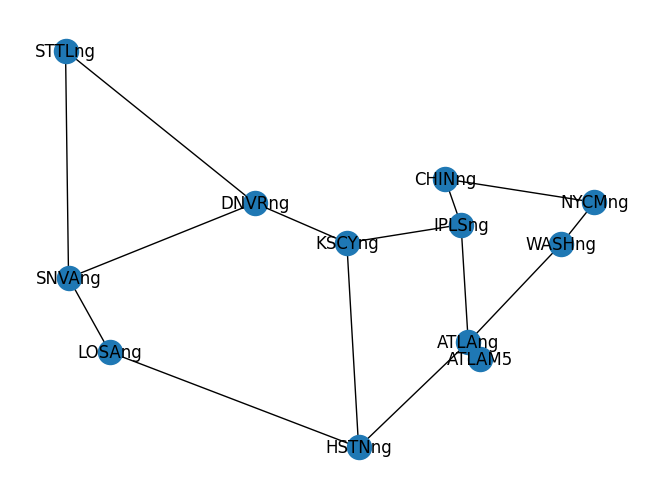

In [2]:
##Instal packages ex: python3.11 -m pip install pandas  

# Importing required libraries
import random
import networkx as nx   # for creating and manipulating graphs
import matplotlib.pyplot as plt   # for visualizing graphs

# Importing required functions
import PerformanceAnalysis.MeasureStatistics as MeasureStatistics  # to measure network statistics
import SearchAlgos.PageRank as  PageRank  # to compute node rankings based on pagerank

# Importing a user-defined function to read network data from XML file
from Import_NetworkFromXML import *

# Defining a function to convert nodes in the XML network dictionary to nodes in networkx graph
def convert_nodes (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))

# Defining a function to convert links in the XML network dictionary to edges in networkx graph
def convert_links (G, nodes, links):
    for link in links.keys():
        source = links[link].get("source")
        for source_node in nodes:
            if nodes[source_node].get('id') == source:
                break
        dest = links[link].get("destination")
        for dest_node in nodes:
            if nodes[dest_node].get('id') == dest:
                break
        capacity = links[link].get("capacity")
        cost = links[link].get("cost")
        G.add_edges_from([(source, dest, {'capacity': capacity, 'cost': cost})])

# Defining a function to convert demands in the XML network dictionary to networkx graph
def convert_demands(G, nodes, demands):    
    a = 1

# Defining a function to create random users in the networkx graph
def create_users (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        randx = random.randint(x_cor,x_cor+x_cor*2)
        randy = random.randint(y_cor,y_cor+y_cor*2)
        print(randx)
        print(randy)

# Defining the name of the network and creating an empty networkx graph
network_name = "abilene.xml"
G = nx.Graph()

# Defining the path to the network XML file and reading the network data from the file
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

# Extracting nodes, links, and demands data from the network data dictionary
nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

# Converting nodes and links data to nodes and edges in networkx graph
convert_nodes(G,nodes)
convert_links(G,nodes,links)

# Calculating shortest paths between all pairs of nodes in the networkx graph
sp = dict(nx.all_pairs_shortest_path(G))

# Drawing the networkx graph with node positions and other attributes
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, style = "solid")

# calling the measure_statistics function and passing the networkx graph G as a parameter
MeasureStatistics.topology_statistics(G)

# calling the assortativity_measure function and passing the networkx graph G as a parameter
MeasureStatistics.assortativity_measure(G)

pagerank_df = PageRank.compute_pagerank(G)
print("Page Rank Weights")
print(pagerank_df)

# Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

# import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

# Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

## To Implement:
1. Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. Allow options (ex. User_Spread).
2. Connect each user to nearest AP: Allow options (ex. SNR, Connected_Users, Access_Technology).
3. Generate demand for each user: Assign User -> Application (Define SFCn = {VNF1 + VNF2 + .... + VNFx}).
4. Create Placement Algorithm for each Placement Solution.
5. Create a Next Candidate Search Algorithm: Takes as an input (G, Users, Demamds).
6. Measure network statistics for each Placement Algorithm.
7. Generate logs for each Placement Algorithm.
8. Save logs in an output file.
9. Create function to plot from the logs.

## Generate Users
Here we will generate users

Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. 

Allow options (ex. User_Spread).

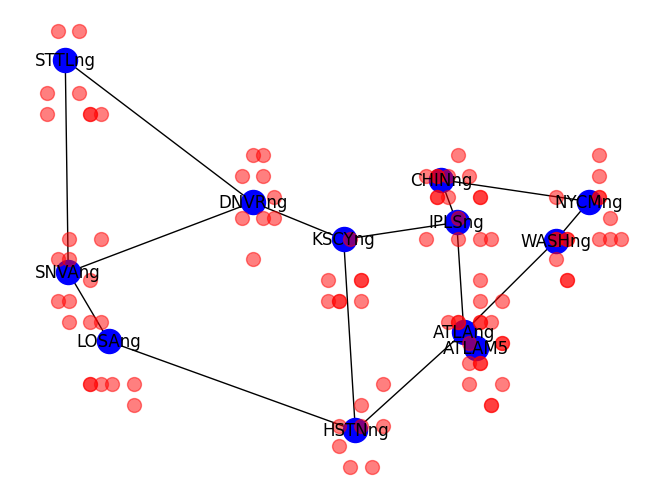

In [3]:
#users

# (1) Create a new graph, G_users, to represent the users.
G_users = nx.Graph()

# (2, 3) Modify the create_users function to add user nodes to G_users and add NoOfUsers parameter
def create_users(G, G_users, nodes, NoOfUsers):
    user_count = 0
    while user_count < NoOfUsers:
        for node in nodes:
            node_id = nodes[node].get("id")
            x_cor = nodes[node].get("x_cor")
            y_cor = nodes[node].get("y_cor")

            # Use random.uniform() instead of random.randint() and convert the result to an integer
            randx = int(random.uniform(x_cor - 2.5, x_cor + 2.5))
            randy = int(random.uniform(y_cor - 2.5, y_cor + 2.5))

            user_id = "user_" + str(user_count)
            G_users.add_node(user_id, pos=(randx, randy))
            user_count += 1

            if user_count >= NoOfUsers:
                break


# (5) Call the create_users function with the desired number of users
NoOfUsers = 100
create_users(G, G_users, nodes, NoOfUsers)

# Draw the original graph G and the graph of users G_users together
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

plt.show()

# Add Edge Device Attributes


In [4]:
# (1) Import the json module
import json

# (2) Load the JSON data from the EdgeDevices.json file
with open("Devices/EdgeDevices.json", "r") as file:
    edge_devices_data = json.load(file)

# (3) Create a function to associate edge devices with their attributes
def associate_edge_devices(G, edge_devices_data):
    edge_devices = edge_devices_data["edgeDevices"]
    edge_servers = edge_devices_data["edgeServers"]

    for node in G.nodes():
        device = random.choice(edge_devices + edge_servers)
        G.nodes[node]["name"] = device["name"]
        G.nodes[node]["formFactor"] = device["formFactor"]
        G.nodes[node]["architecture"] = device["architecture"]
        G.nodes[node]["cpu"] = device["cpu"]
        G.nodes[node]["memory"] = device["memory"]
        G.nodes[node]["storage"] = device["storage"]
        G.nodes[node]["source"] = device["source"]

# (4) Call the function to update the attributes of the edge devices in the graph
associate_edge_devices(G, edge_devices_data)

#Debug to print
for node, attrs in G.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        print(f"  {attr_key}: {attr_value}")
    print()


Node: ATLAM5
  pos: (-84.3833, 33.75)
  name: HPE SimpliVity 380 Gen10 H
  formFactor: 26417
  architecture: x86
  cpu: up to 28x2.90GHz
  memory: up to 3TB
  storage: up to 25TB
  source: Edge_Device_HPE_SimpliVity380

Node: ATLAng
  pos: (-85.5, 34.5)
  name: NEXCOM CPS 200 Edge Gateway
  formFactor: 2855
  architecture: x86
  cpu: 4x2.00GHz
  memory: 4GB
  storage: 50GB
  source: Edge_Devices_NEXCOM_CPS200

Node: CHINng
  pos: (-87.6167, 41.8333)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: up to 28x2.90GHz
  memory: up to 3TB
  storage: up to 30TB
  source: Edge_Device_Cisco_HX220

Node: DNVRng
  pos: (-105.0, 40.75)
  name: Cisco IR829 Router
  formFactor: 2400
  architecture: x86
  cpu: 2x1.25GHz
  memory: 2GB
  storage: 8GB
  source: Edge_Device_Cisco-IR829

Node: HSTNng
  pos: (-95.517364, 29.770031)
  name: Raspberry Pi 4 Model B
  formFactor: 53
  architecture: AArch64
  cpu: 4x1.50GHz
  memory: 8GB
  storage: 16GB
  source: Edge_Devic

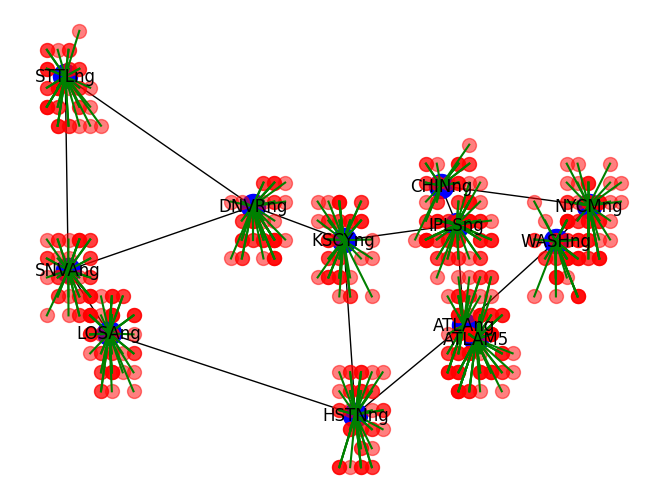

In [5]:
from scipy.spatial.distance import euclidean
import random
import networkx as nx
import matplotlib.pyplot as plt

# ... (other functions you've already defined) ...

# Function to find the nearest AP for a given user position
def find_nearest_ap(G, user_pos):
    min_distance = float('inf')
    nearest_ap = None
    nearest_pos = None

    for ap, pos in nx.get_node_attributes(G, 'pos').items():
        distance = euclidean(user_pos, pos)
        if distance < min_distance:
            min_distance = distance
            nearest_ap = ap
            nearest_pos = pos

    return nearest_ap, nearest_pos

# Updated create_users function to track user connections
def create_users(G, G_users, nodes, NoOfUsers):
    user_connections = []
    user_count = 0
    while user_count < NoOfUsers:
        for node in nodes:
            node_id = nodes[node].get("id")
            x_cor = nodes[node].get("x_cor")
            y_cor = nodes[node].get("y_cor")
            randx = int(random.uniform(x_cor - 2.5, x_cor + 2.5))
            randy = int(random.uniform(y_cor - 2.5, y_cor + 2.5))

            user_pos = (randx, randy)
            nearest_ap, nearest_pos = find_nearest_ap(G, user_pos)

            user_id = "user_" + str(user_count)
            G_users.add_node(user_id, pos=user_pos)
            user_connections.append((user_pos, nearest_pos))

            user_count += 1
            if user_count >= NoOfUsers:
                break

    return user_connections

# (rest of the existing code)

# ...
# Create a new graph for users and call create_users
G_users = nx.Graph()
NoOfUsers = 500
user_connections = create_users(G, G_users, nodes, NoOfUsers)

# Draw the graphs and user connections
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

# Draw the connections between users and APs
for user_pos, ap_pos in user_connections:
    plt.plot([user_pos[0], ap_pos[0]], [user_pos[1], ap_pos[1]], color="green", linestyle="-")

plt.show()

# ... (rest of the existing code)
